In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df=pd.read_csv(r'C:\Users\SREEVIBU\OneDrive\Desktop\ETE_2_CO2\CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [95]:
print(df.shape)
df.isnull().sum()

(7385, 12)


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [97]:
numeric_cols=['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']

In [98]:
df[numeric_cols].skew()

Engine Size(L)                      0.809181
Cylinders                           1.110415
Fuel Consumption City (L/100 km)    0.809005
Fuel Consumption Hwy (L/100 km)     1.079217
Fuel Consumption Comb (L/100 km)    0.893316
Fuel Consumption Comb (mpg)         0.977034
dtype: float64

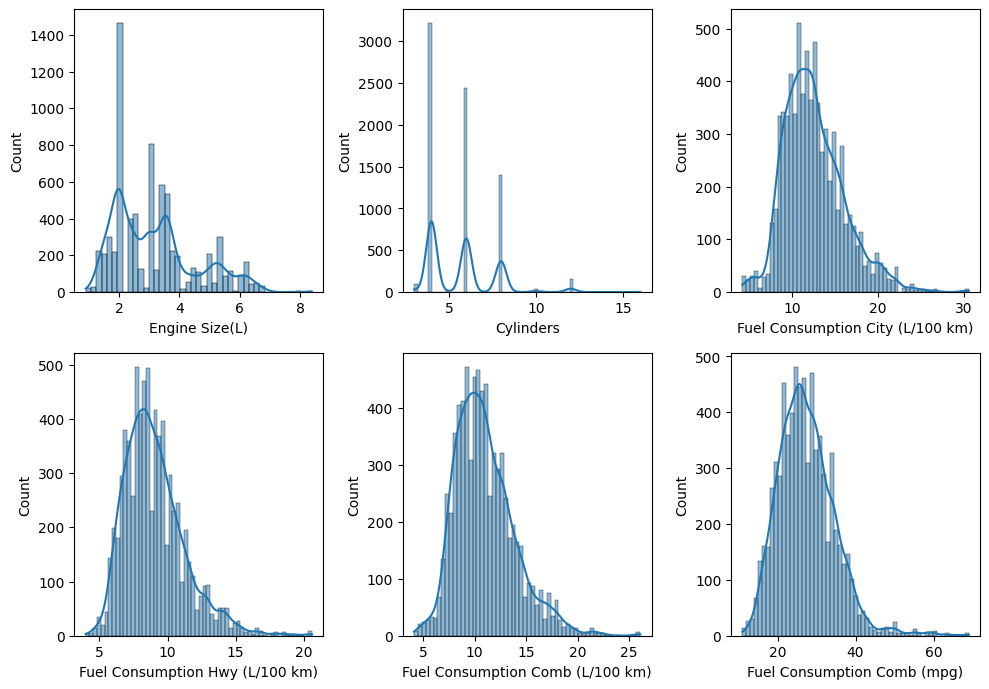

In [99]:
plt.figure(figsize=(10,10))
for i,cols in enumerate(numeric_cols):
  plt.subplot(3,3,i+1)
  sns.histplot(df[cols],kde=True)
plt.tight_layout()
plt.show()


In [100]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df[numeric_cols]=pt.fit_transform(df[numeric_cols])

In [101]:
df[numeric_cols].skew()

Engine Size(L)                      0.044960
Cylinders                           0.107891
Fuel Consumption City (L/100 km)    0.003498
Fuel Consumption Hwy (L/100 km)    -0.000339
Fuel Consumption Comb (L/100 km)   -0.002658
Fuel Consumption Comb (mpg)        -0.000303
dtype: float64

In [102]:
df[numeric_cols].isnull().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
dtype: int64

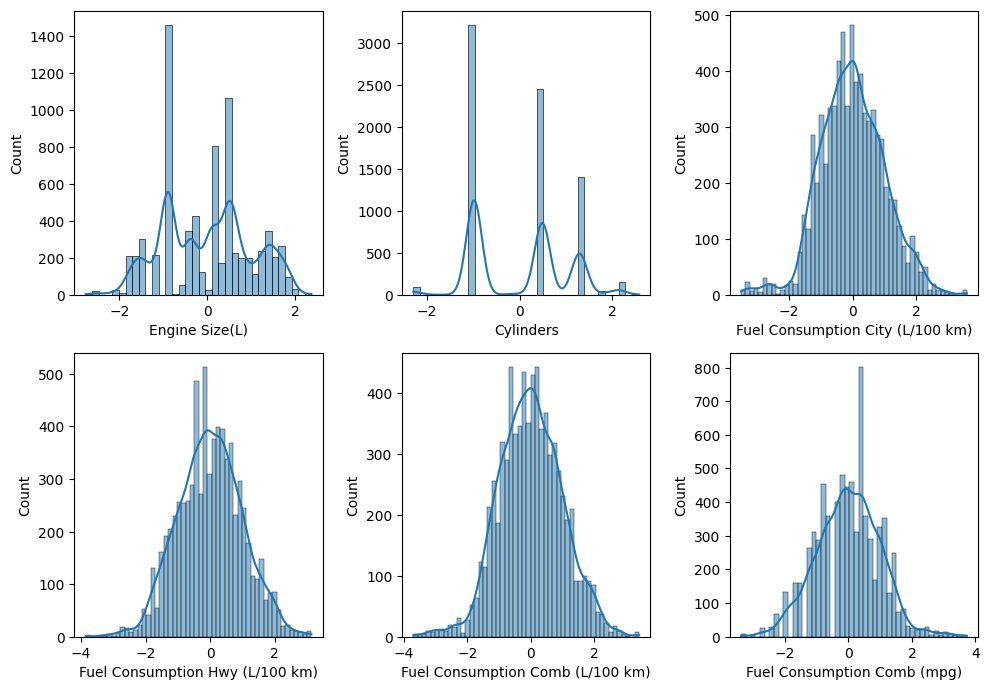

In [103]:
plt.figure(figsize=(10,10))
for i,cols in enumerate(numeric_cols):
  plt.subplot(3,3,i+1)
  sns.histplot(df[cols],kde=True)
plt.tight_layout()
plt.show()

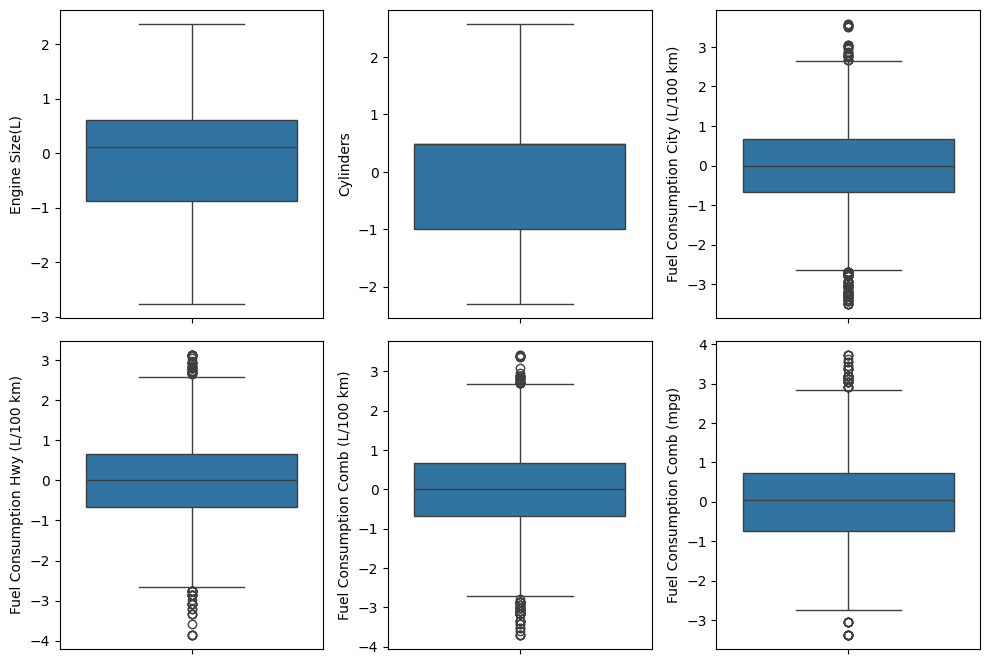

In [104]:
plt.figure(figsize=(10,10))
for i,cols in enumerate(numeric_cols):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[cols])
plt.tight_layout()
plt.show()

In [105]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03,7.385000e+03,7385.000000
mean,-1.100692e-15,7.408502e-15,9.698403e-16,6.369388e-16,-2.782518e-15,1.554823e-15,250.584699
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,58.512679
min,-2.768143e+00,-2.297373e+00,-3.492070e+00,-3.852938e+00,-3.704149e+00,-3.378104e+00,96.000000
25%,-8.859652e-01,-9.868509e-01,-6.642422e-01,-6.605472e-01,-6.850797e-01,-7.371612e-01,208.000000
50%,1.074675e-01,4.854316e-01,-1.935139e-02,3.706070e-04,-1.840494e-03,5.706952e-02,246.000000
75%,6.081547e-01,4.854316e-01,6.714202e-01,6.678375e-01,6.698230e-01,7.189375e-01,288.000000
max,2.374867e+00,2.576776e+00,3.580729e+00,3.130886e+00,3.424396e+00,3.730664e+00,522.000000


In [106]:
outliers_cols=['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']

In [107]:
for cols in outliers_cols:
  Q1=df[cols].quantile(0.25)
  Q3=df[cols].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  df[cols]=df[cols].clip(lower,upper)


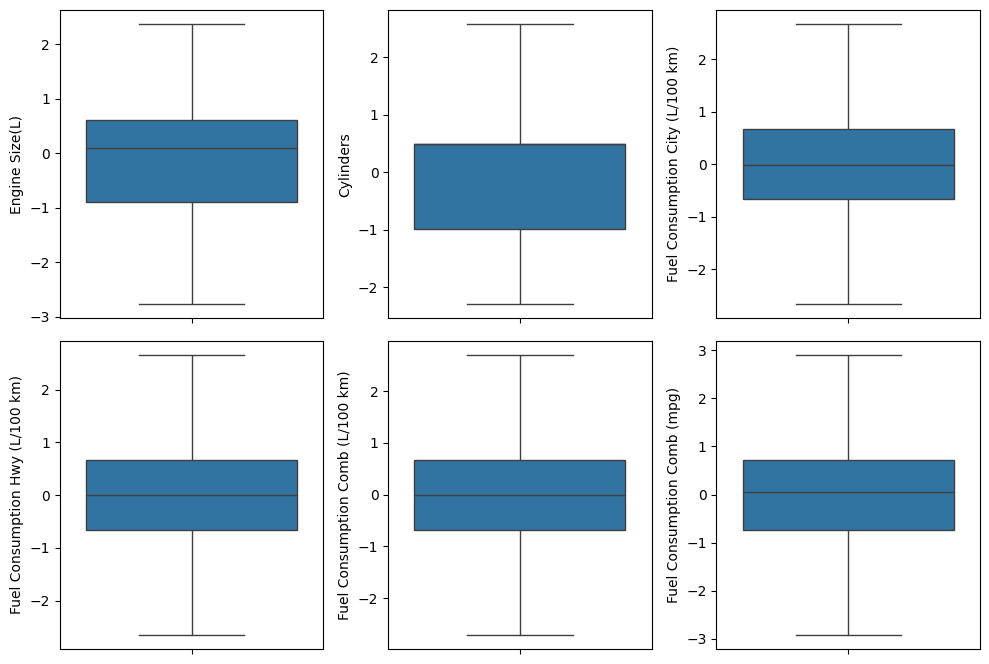

In [108]:
plt.figure(figsize=(10,10))
for i,cols in enumerate(numeric_cols):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[cols])
plt.tight_layout()
plt.show()

In [109]:
corr=df[numeric_cols].corr()

[]

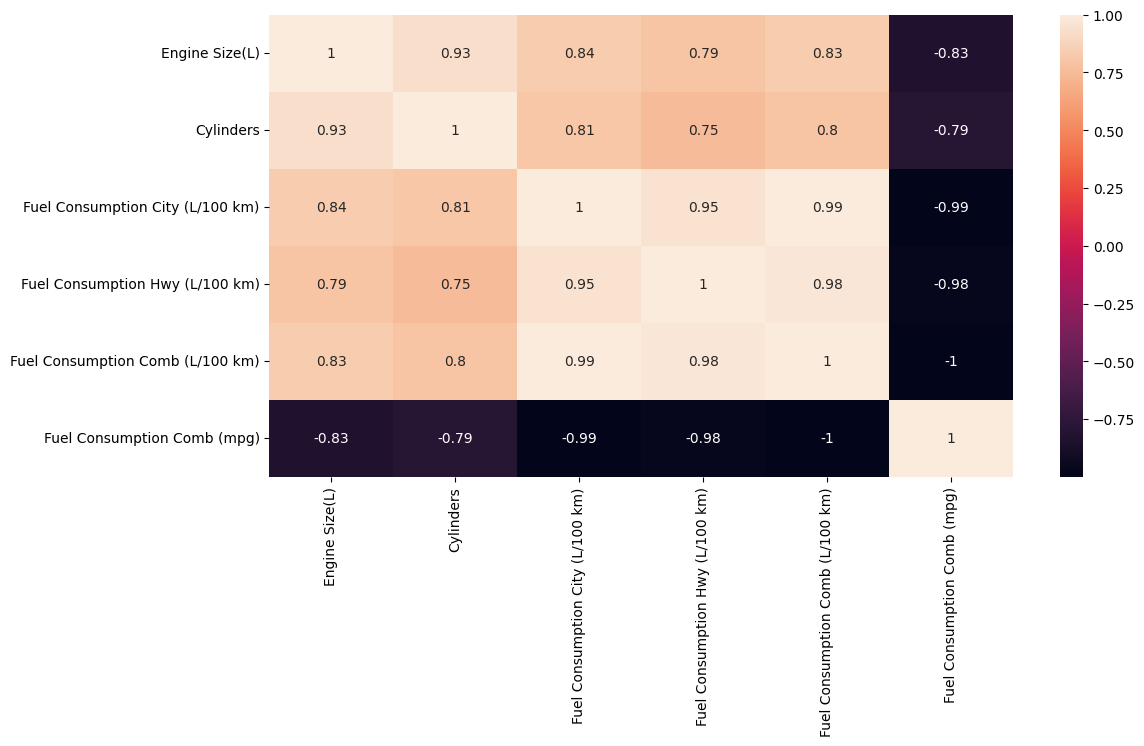

In [110]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.plot()

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
feature=['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']

In [113]:
X=df[feature]
y=df['CO2 Emissions(g/km)']

In [114]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [116]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [117]:
models={
    "LinearRegression":LinearRegression(),
    "ridge":RidgeCV(),
    "LassoCV":LassoCV(),
    # "support vector regression":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor":RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor":GradientBoostingRegressor(random_state=42),
    "XGBRegressor":XGBRegressor()}

In [118]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    n = x_test_scaled.shape[0]
    p = x_test_scaled.shape[1]

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


LinearRegression
R² Score: 0.8976
Adjusted R² Score: 0.8972
MSE: 343.6877
RMSE: 18.5388

ridge
R² Score: 0.8977
Adjusted R² Score: 0.8973
MSE: 343.5400
RMSE: 18.5348

LassoCV
R² Score: 0.8977
Adjusted R² Score: 0.8972
MSE: 343.6531
RMSE: 18.5379

KNeighborsRegressor
R² Score: 0.9780
Adjusted R² Score: 0.9780
MSE: 73.7330
RMSE: 8.5868

DecisionTreeRegressor
R² Score: 0.9665
Adjusted R² Score: 0.9663
MSE: 112.5788
RMSE: 10.6103

RandomForestRegressor
R² Score: 0.9767
Adjusted R² Score: 0.9766
MSE: 78.3942
RMSE: 8.8541

GradientBoostingRegressor
R² Score: 0.9666
Adjusted R² Score: 0.9665
MSE: 112.1039
RMSE: 10.5879

XGBRegressor
R² Score: 0.9776
Adjusted R² Score: 0.9775
MSE: 75.3072
RMSE: 8.6780


In [119]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("CO2 Emissions Prediction")      

<Experiment: artifact_location='file:///c:/Users/SREEVIBU/OneDrive/Desktop/ETE_2_CO2/mlruns/127392903406511617', creation_time=1761496676008, experiment_id='127392903406511617', last_update_time=1761496676008, lifecycle_stage='active', name='CO2 Emissions Prediction', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [120]:
from my_mlflow_utils import run_models

run_models(models, x_train_scaled, y_train, x_test_scaled, y_test)

2025/10/26 23:05:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



LinearRegression Results:


2025/10/26 23:05:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run completed. Run ID: 8b3d42cfb2774033abff459e8e4e1517

ridge Results:


Run completed. Run ID: 9cbffd21bcb94a4ca5d6525351aae257

LassoCV Results:


C:\Users\SREEVIBU\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+04, tolerance: 1.569e+03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\SREEVIBU\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+03, tolerance: 1.541e+03
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\SREEVIBU\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the feat

Best Parameters: {'alphas': [0.01, 0.1, 1.0]}


Run completed. Run ID: 85b2f4e6e24c44c8b8e5ad874d84a4d5

KNeighborsRegressor Results:


2025/10/26 23:05:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}


Run completed. Run ID: 0eb251edd60d4e869deedc0c2866248a

DecisionTreeRegressor Results:


2025/10/26 23:06:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'max_depth': None, 'min_samples_split': 5}


Run completed. Run ID: f04e1a2bf29c44faae2a216ee1d22d3c

RandomForestRegressor Results:


2025/10/26 23:06:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


Run completed. Run ID: 608dadf241cb42bbba373e214aa7334c

GradientBoostingRegressor Results:


2025/10/26 23:06:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Run completed. Run ID: 35b2cdd14eef464e8d2a76efe7e9c5be

XGBRegressor Results:


2025/10/26 23:07:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


Run completed. Run ID: d0cd04dfe5c4429ca4ccb6286f1101d9


In [121]:
import pickle
pickle.dump(models, open('models.pkl', 'wb'))
pickle.dump(pt,open("pt.pkl",'wb'))